<a href="https://colab.research.google.com/github/Ashsin78/DataScienceProject/blob/main/Capstone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Objective:** To predict whether to approve a credit card to customer or not

In this project we will try to answer the following questions:
1. Is the data is correct and sufficient for the purpose of model building and training?
2. Are there missing and duplicate values in the data that can affect our modeling?
3. Whether the given features are sufficient in correctly predicting the desired outcome(whether to approve creadit card of not)?
4. Is additional data/features required to achieve the desired objective?

Predicting a good client is very important for banking industry as it can lower the risk of defaulting and minimizing NPA's.

Initial hypothesis is that data is sufficient to correctly predict whether to approve a credit card to customer or not .For verifying this we will clean the dataset and do feature engineering and model building and test their accuracy.

**Importing the necessary libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

### **Reading the datasets**

In [ ]:
df3=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CreditCard-Dataset/Credit_card.csv")
df3.sample(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
413,5111159,F,Y,Y,1,81000.0,Working,Higher education,Married,House / apartment,-10648.0,-1393,1,1,1,0,Core staff,3
672,5010567,F,Y,Y,0,121500.0,Working,Higher education,Married,House / apartment,-10145.0,-1682,1,0,0,1,Sales staff,2
437,5113288,F,Y,Y,2,121500.0,Working,Incomplete higher,Married,House / apartment,-11327.0,-101,1,1,1,0,Core staff,4
1139,5142239,F,Y,Y,0,270000.0,State servant,Higher education,Married,House / apartment,-16421.0,-8230,1,0,0,0,Managers,2
1174,5046191,M,Y,Y,2,270000.0,Commercial associate,Higher education,Married,House / apartment,-17280.0,-565,1,1,0,0,Managers,4


In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CreditCard-Dataset/Credit_card_label.csv")
df2.head(5)

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


***Checking the information of various parameters***

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
df3.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


##*** Visualising the data and checking for missing values and handling them***

In [ ]:
df3.isnull().sum()/df3.shape[0]*100    # Percentage of missing values in each column

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
dtype: float64

***Dropping "Type_Occupation" column since more than 30% data is missing***

In [ ]:
df3.drop(["Type_Occupation"],axis=1,inplace=True)

***Filling missing GENDER values with most frequent occuring gender***

In [ ]:
imputer=SimpleImputer(strategy="most_frequent")
imputer.fit(df3[["GENDER"]])
df3[["GENDER"]]=imputer.fit_transform(df3[["GENDER"]])

***Filling missing annual income and birthday_count with median values***

In [ ]:
imputer=SimpleImputer(strategy="median")
imputer.fit(df3[["Annual_income","Birthday_count"]])
df3[["Annual_income","Birthday_count"]]=imputer.fit_transform(df3[["Annual_income","Birthday_count"]])

In [ ]:
df3.isnull().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
dtype: int64

***Setting Birthday_count,Employed_days to more appropriate format***

In [ ]:
df3["AGE"] = ((-df3["Birthday_count"])/365).apply(int)
df3 = df3.drop(["Birthday_count"],axis=1)

In [ ]:
df3["Employed_years"] = np.ceil(-(df3["Employed_days"]/365))
df3=df3.drop(["Employed_days"],axis=1)
df3.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,AGE,Employed_years
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,2,51,-1000.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,37,2.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,42,2.0
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,37,2.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,2,37,2.0


<Axes: >

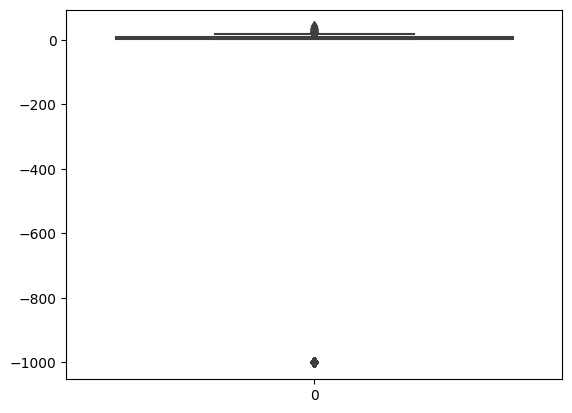

In [ ]:
sns.boxplot(df3["Employed_years"])

In [ ]:
df3["Employed_years"].describe()

count    1548.000000
mean     -162.106589
std       377.498163
min     -1000.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        41.000000
Name: Employed_years, dtype: float64

<Axes: >

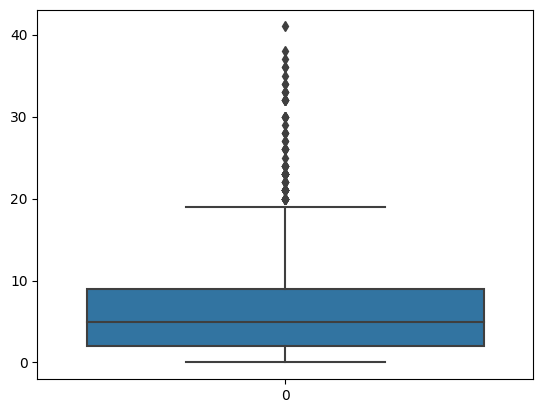

In [ ]:
# Handling data where employed years is -1000 years
df3["Employed_years"]=np.where(df3["Employed_years"]==-1000,0,df3["Employed_years"])
sns.boxplot(df3["Employed_years"])

<Axes: >

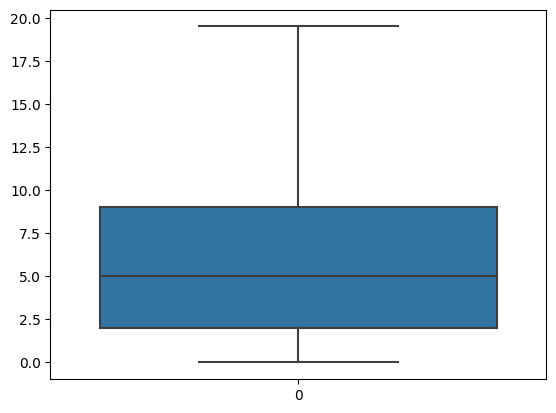

In [ ]:
IQR=9-2
UC=9+1.5*IQR
df3["Employed_years"]=np.where(df3["Employed_years"]>UC,UC,df3["Employed_years"])
sns.boxplot(df3["Employed_years"])

In [ ]:
df1.to_csv('C:\\Users\\Ashish\\Desktop\\creditdata.csv')

<ipython-input-19-0173ad3aa115>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3["Annual_income"])


<Axes: xlabel='Annual_income', ylabel='Density'>

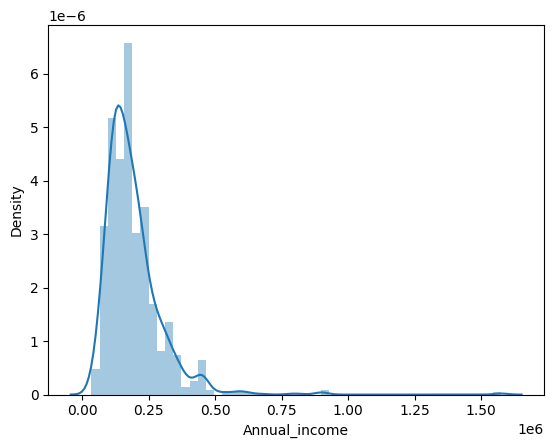

In [ ]:
sns.distplot(df3["Annual_income"])

The distribution is right skewed so we apply log transformation to handle skewness

<ipython-input-20-2e574700dccb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3["Annual_income"])


<Axes: xlabel='Annual_income', ylabel='Density'>

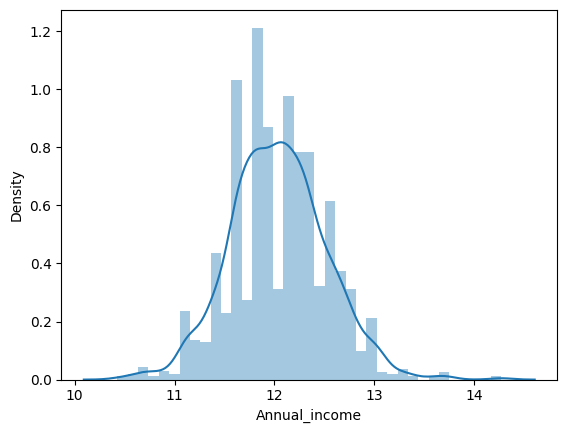

In [ ]:
df3["Annual_income"]=np.log(df3["Annual_income"])
sns.distplot(df3["Annual_income"])

In [ ]:
df3["Mobile_phone"].value_counts()

1    1548
Name: Mobile_phone, dtype: int64

In [ ]:
# Since there is only one value (1) for Mobile_phone data is not beneficial hence dropping it
df3 = df3.drop('Mobile_phone',axis=1)

### Encoding the nominal data columns

In [ ]:
df3["Housing_type"].unique()
df3=pd.get_dummies(df3,columns=["Housing_type","Type_Income","Marital_status"],drop_first=True)
df3.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Work_Phone,Phone,EMAIL_ID,...,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow
0,5008827,M,Y,Y,0,12.100712,Higher education,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,5009744,F,Y,N,0,12.660328,Higher education,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,5009746,F,Y,N,0,12.660328,Higher education,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,5009749,F,Y,N,0,12.022751,Higher education,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5009752,F,Y,N,0,12.660328,Higher education,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df3["EDUCATION"].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

### Encoding the Ordinal Data columns

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['Lower secondary', 'Secondary / secondary special','Incomplete higher','Higher education', 'Academic degree']])
oe.fit(df3[["EDUCATION"]])
df3[["EDUCATION"]]=oe.transform(df3[["EDUCATION"]])
df3

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Work_Phone,Phone,EMAIL_ID,...,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow
0,5008827,M,Y,Y,0,12.100712,3.0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,5009744,F,Y,N,0,12.660328,3.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,5009746,F,Y,N,0,12.660328,3.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,5009749,F,Y,N,0,12.022751,3.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5009752,F,Y,N,0,12.660328,3.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,12.022751,3.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1544,5023655,F,N,N,0,12.323856,2.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1545,5115992,M,Y,Y,2,12.100712,3.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1546,5118219,M,Y,N,0,12.506177,1.0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


### Binary Encoding the columns with two values

In [ ]:
df3["GENDER"]=df3["GENDER"].map({"F":0,"M":1})
df3["Car_Owner"]=df3["Car_Owner"].map({"N":0,"Y":1})
df3["Propert_Owner"]=df3["Propert_Owner"].map({"N":0,"Y":1})

In [ ]:
df3.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Work_Phone,Phone,EMAIL_ID,...,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow
0,5008827,1,1,1,0,12.100712,3.0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,5009744,0,1,0,0,12.660328,3.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,5009746,0,1,0,0,12.660328,3.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,5009749,0,1,0,0,12.022751,3.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5009752,0,1,0,0,12.660328,3.0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


### Merging both datasets to get the final dataset

In [ ]:
df2["Ind_ID"].nunique()    # checking number of unique customer id in both datasets

1548

In [ ]:
df3["Ind_ID"].nunique()

1548

In [ ]:
df1=pd.merge(df3,df2,on="Ind_ID")
df1.sample(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Work_Phone,Phone,EMAIL_ID,...,Housing_type_Rented apartment,Housing_type_With parents,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,label
800,5112765,0,1,0,1,12.660328,3.0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
460,5054188,0,0,0,0,11.813030,1.0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
580,5047853,1,1,1,1,12.586220,3.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1027,5089887,0,0,1,0,11.967181,3.0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
515,5088836,0,0,1,0,13.324488,1.0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


Visualizing credit card approval and rejection

<Axes: xlabel='label', ylabel='count'>

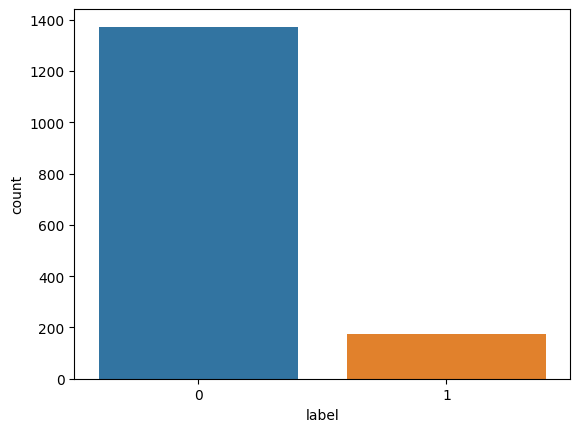

In [ ]:
sns.countplot(x=df1["label"],data=df1)

### Dropping irrelevant columns

In [ ]:
nf=df1.drop(["Ind_ID","CHILDREN","Work_Phone","EMAIL_ID","Phone","GENDER"],axis=1)
#nf.shape

### Dropping duplicate rows

In [ ]:
ndf=nf.drop_duplicates()
ndf.shape

(1374, 20)

In [ ]:
ndf.describe()

,Car_Owner,Propert_Owner,Annual_income,EDUCATION,Family_Members,AGE,Employed_years,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,label
count,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000
mean,0.400291,0.649927,12.032391,1.575691,2.178311,43.303493,6.142285,0.890102,0.033479,0.005822,0.014556,0.053857,0.172489,0.073508,0.514556,0.676856,0.061863,0.146288,0.047307,0.096798
std,0.490136,0.477166,0.480059,0.905445,0.963014,11.401960,5.645347,0.312877,0.179949,0.076110,0.119811,0.225818,0.377943,0.261064,0.499970,0.467848,0.240995,0.353524,0.212372,0.295790
min,0.000000,0.000000,10.426736,0.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,11.708492,1.000000,2.000000,34.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,12.022751,1.000000,2.000000,42.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,12.323856,3.000000,3.000000,53.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,14.269766,4.000000,15.000000,68.000000,19.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Handling the outliers in the data

<ipython-input-35-b3ddd6f8751b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf["Family_Members"]=np.where(ndf["Family_Members"]>UC,UC,ndf["Family_Members"])


<Axes: >

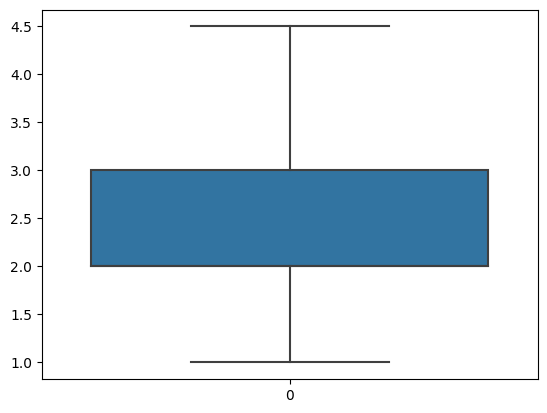

In [ ]:
IQR=3-2
UC=3+1.5*IQR
ndf["Family_Members"]=np.where(ndf["Family_Members"]>UC,UC,ndf["Family_Members"])
sns.boxplot(ndf["Family_Members"])

In [ ]:
ndf.corr()      # it shows very less correlation of various features with label

,Car_Owner,Propert_Owner,Annual_income,EDUCATION,Family_Members,AGE,Employed_years,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,label
Car_Owner,1.000000,0.001682,0.250505,0.126976,0.116746,-0.130186,0.010066,0.035354,-0.069476,0.054622,0.024733,-0.017251,-0.137097,0.014632,0.047537,0.161127,-0.043315,-0.098604,-0.098091,-0.016271
Propert_Owner,0.001682,1.000000,0.040992,-0.003527,-0.009628,0.123826,-0.064096,0.200697,-0.134839,-0.024054,-0.012721,-0.149344,0.096795,-0.038838,-0.065633,0.001852,0.004789,-0.020014,0.019799,-0.012593
Annual_income,0.250505,0.040992,1.000000,0.252533,0.039936,-0.113180,0.105323,0.004411,-0.053268,0.041177,0.028614,0.015992,-0.199499,0.040848,-0.038819,-0.003852,0.006670,0.035822,-0.067322,0.026685
EDUCATION,0.126976,-0.003527,0.252533,1.000000,0.075472,-0.170167,0.021224,-0.002752,-0.055795,0.004169,-0.016877,0.054852,-0.113736,0.079665,-0.070813,0.062940,0.030261,-0.017552,-0.107645,0.009336
Family_Members,0.116746,-0.009628,0.039936,0.075472,1.000000,-0.298133,0.135556,0.040369,-0.082900,0.018320,-0.001948,0.017770,-0.243603,0.045664,0.100784,0.542991,-0.248467,-0.441828,-0.271126,-0.023270
AGE,-0.130186,0.123826,-0.113180,-0.170167,-0.298133,1.000000,-0.101336,0.167787,0.019893,0.019784,-0.084809,-0.211153,0.605253,-0.059862,-0.280130,-0.047685,0.074005,-0.098295,0.248829,0.045272
Employed_years,0.010066,-0.064096,0.105323,0.021224,0.135556,-0.101336,1.000000,0.034425,-0.038748,0.042991,-0.007372,-0.030297,-0.476956,0.179207,0.229893,0.064852,-0.025747,-0.018283,-0.121649,-0.079786
Housing_type_House / apartment,0.035354,0.200697,0.004411,-0.002752,0.040369,0.167787,0.034425,1.000000,-0.529669,-0.217793,-0.345884,-0.678999,0.068035,-0.025861,-0.024686,0.070681,0.003297,-0.098181,0.023494,-0.034498
Housing_type_Municipal apartment,-0.069476,-0.134839,-0.053268,-0.055795,-0.082900,0.019893,-0.038748,-0.529669,1.000000,-0.014243,-0.022620,-0.044404,0.054247,0.009591,-0.037802,-0.079032,0.002591,0.117588,0.015702,0.089590
Housing_type_Office apartment,0.054622,-0.024054,0.041177,0.004169,0.018320,0.019784,0.042991,-0.217793,-0.014243,1.000000,-0.009301,-0.018258,-0.034939,0.015100,0.016911,-0.008485,-0.019652,-0.004610,-0.017053,0.007299


***Splitting the datasets***

In [ ]:
X=ndf.iloc[:,:-1].values
Y=ndf.iloc[:,-1].values

### Dividing the dataset into test and train dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.4,random_state=0)

### Scaling the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc=StandardScaler()
mm=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### **Model building the checking the accuracy**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score,confusion_matrix
print("The accuracy score of Logistic Regression is :",round(accuracy_score(y_test,y_pred),2))
print("Confusion matrix :",confusion_matrix(y_test,y_pred))

The accuracy score of Logistic Regression is : 0.91
Confusion matrix : [[498   0]
 [ 52   0]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("The accuracy score of RandomForest Regression is :",round(accuracy_score(y_test,y_pred),2))
print("Confusion matrix :",confusion_matrix(y_test,y_pred))

The accuracy score of RandomForest Regression is : 0.89
Confusion matrix : [[491   7]
 [ 51   1]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
print("The accuracy score of DecisionTreeRegressor training set is :",round(dtr.score(x_train,y_train),2))
print("The accuracy score of DecisionTreeRegressor test set is :",round(dtr.score(x_test,y_test),2))
print("Confusion matrix :",confusion_matrix(y_test,y_pred))

The accuracy score of DecisionTreeRegressor training set is : 1.0
The accuracy score of DecisionTreeRegressor test set is : 0.84
Confusion matrix : [[455  43]
 [ 46   6]]


In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
print("The accuracy score of Support Vector Classifier is :",round(accuracy_score(y_test,y_pred),2))
print("Confusion matrix :",confusion_matrix(y_test,y_pred))

The accuracy score of Support Vector Classifier is : 0.91
Confusion matrix : [[498   0]
 [ 52   0]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=9)
knc.fit(x_train,y_train)
y_pred=knc.predict(x_test)
print("The accuracy score of KNeighborsClassifier is :",round(accuracy_score(y_test,y_pred),2))
print("Confusion matrix :",confusion_matrix(y_test,y_pred))

The accuracy score of KNeighborsClassifier is : 0.91
Confusion matrix : [[498   0]
 [ 52   0]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("The accuracy score of naive_bayes is :",round(accuracy_score(y_test,y_pred),2))
print("Confusion matrix :",confusion_matrix(y_test,y_pred))

The accuracy score of naive_bayes is : 0.85
Confusion matrix : [[460  38]
 [ 45   7]]


# **Conclusion :**
The models developed succeded with around 90% accuracy in correctly predicting credit card approval.This will ease the process of approval of credit cards and help banking industry a lot.
The performance of the model can be increased further by adding highly relavant data, e.g. credit score,debt, and expense.